In [15]:
%load_ext autoreload
%autoreload 2

from pygtfcode import Config, State
from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Instantiate config object and set some parameters

In [16]:
config = Config()

In [17]:
config.init = 'abg'
# config.init.deltaP = 1.0e-5
config.grid.rmin = 0.01
config.prec.eps_dt = 1.0e-3

In [18]:
config

Config(
  io=IOParams(model_no='<not evaluated>', model_dir='<not evaluated>', base_dir='/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests', nlog=100000, drho_prof=0.1, drho_tevol=0.01, overwrite=True, chatter=True),
  grid=GridParams(rmin=0.01, rmax=200.0, ngrid=200),
  init=ABGParams(Mvir=3000000000.0, cvir=20.0, z=0.0, alpha=4.0, beta=4.0, gamma=0.1),
  sim=SimParams(a=2.256758, b=1.38, c=0.75, rho_c_halt=1500.0, sigma_m=10.0, t_halt=1000.0),
  prec=PrecisionParams(eps_dr=1e-12, eps_dt=0.001, eps_du=0.001, epsabs=1e-06, epsrel=1e-06, max_iter_dr=20000, max_iter_du=10, max_iter_v2=10)
)

In [19]:
config.io.model_no = 0

# Instantiate State

In [20]:
state = State(config)

Computing characteristic parameters for simulation...
Setting up radial grid...
Initializing profiles...
State initialized.
Directory already exists: /Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests/Model000
Model information written to model_metadata.txt


In [21]:
state.run()


Initial profiles written to disk.
Time evolution file initialized.
Log file initialized:
      step          time            dt         rho_c         v_max        Kn_min   <n_iter_du>   <n_iter_v2>   <n_iter_dr>
         0  0.000000e+00  1.000000e-06  1.639545e+00  3.945163e-01  2.468654e+01       0.0e+00       0.0e+00       0.0e+00
    100000  2.663335e-01  3.465375e-08  1.322876e+00  3.932749e-01  2.407308e+01       1.2e-01       0.0e+00       2.1e+00
    200000  4.132415e-01  8.993637e-08  1.381664e+00  3.892298e-01  2.376959e+01       1.1e-01       0.0e+00       2.1e+00
    300000  5.377352e-01  1.954719e-08  1.434924e+00  3.910453e-01  2.352838e+01       1.1e-01       0.0e+00       2.1e+00
    400000  6.433737e-01  4.957971e-07  1.470221e+00  3.837826e-01  2.333300e+01       1.2e-01       0.0e+00       2.1e+00
    500000  7.512622e-01  7.945086e-08  1.510987e+00  3.818822e-01  2.314087e+01       1.2e-01       0.0e+00       2.1e+00
    600000  8.568254e-01  1.486578e-07  1.546875e+

RuntimeError: Max iterations exceeded for v2 in conduction/revirialization step

In [22]:
state.config.init.profile == 'abg' and state.config.init.gamma < 1.0

True

[ 99.90871402 105.93651824 112.32799868] [0.00108708 0.00066761 0.00025724]


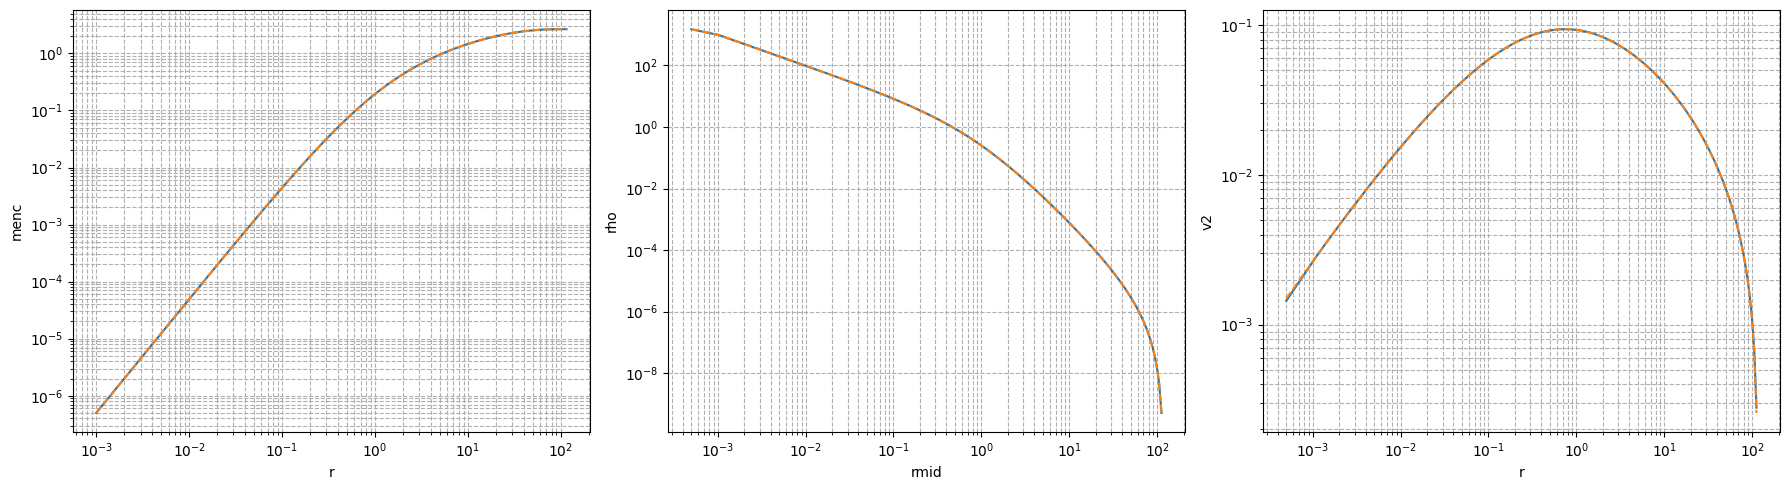

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Load and plot data from the Fortran output file
fortran_data = np.loadtxt('/Users/yaronetokayer/gtfcode/debug_trunc.txt')

r_f = fortran_data[:, 0]
rmid_f = fortran_data[:, 1]
m_f = fortran_data[:, 2]
rho_f = fortran_data[:, 3]
v2_f = fortran_data[:, 4]
print(rmid_f[-3:], v2_f[-3:])

# Plot 1: Mass profile
axs[0].loglog(state.r[1:], state.m[1:])
axs[0].loglog(r_f, m_f, linestyle='--')
axs[0].set_xlabel('r')
axs[0].set_ylabel('menc')
axs[0].grid(True, which="both", ls="--")

# Plot 2: density profile
axs[1].loglog(state.rmid, state.rho)
axs[1].loglog(rmid_f, rho_f, linestyle='--')
axs[1].set_xlabel('rmid')
axs[1].set_ylabel('rho')
axs[1].grid(True, which="both", ls="--")

# Plot 2: Density profile
# axs[2].loglog(state.rmid, state.rho_interp(state.pot_interp(state.rmid)))
# axs[2].set_xlabel('rmid')
# axs[2].set_ylabel('rho_interp')
# axs[2].grid(True, which="both", ls="--")

# Plot 3: Velocity dispersion profile
axs[2].loglog(state.rmid, state.v2)
axs[2].loglog(rmid_f, v2_f, linestyle='--')
axs[2].set_xlabel('r')
axs[2].set_ylabel('v2')
axs[2].grid(True, which="both", ls="--")

# # Plot 3: Velocity dispersion profile
# axs[1].loglog(state.rho_interp.x, state.rho_interp(state.rho_interp.x))
# axs[1].set_xlabel('potential')
# axs[1].set_ylabel('rho_interp')
# axs[1].grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

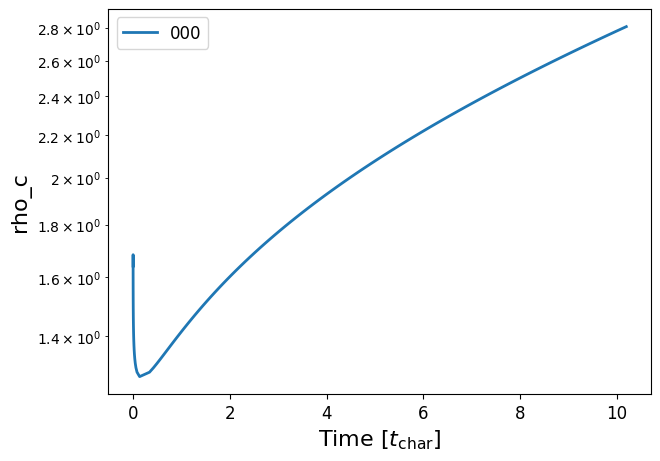

In [28]:
from pygtfcode.plot.time_evolution import plot_time_evolution

plot_time_evolution(0, base_dir='./')

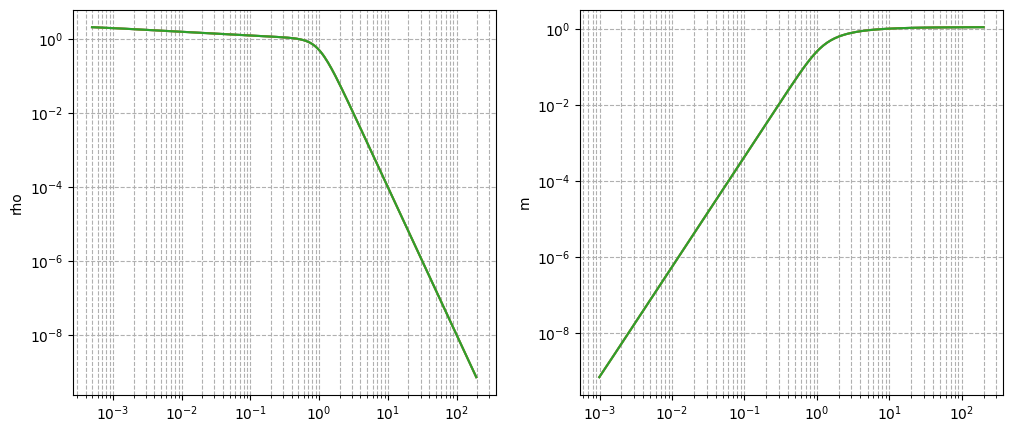

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i in index:
    filename = f'/Users/yaronetokayer/YaleDrive/Research/SIDM/pygtfcode/tests/Model000/profile_{i}.dat'
    data = np.loadtxt(filename, skiprows=1)
    r_out = 10**data[:,1]
    rmid = 10**data[:,2]
    m = data[:,3]
    rho = data[:,4]

    axs[0].loglog(rmid, rho)
    axs[0].set_ylabel('rho')
    axs[0].grid(True, which="both", ls="--")

    axs[1].loglog(r_out, m)
    axs[1].set_ylabel('m')
    axs[1].grid(True, which="both", ls="--")

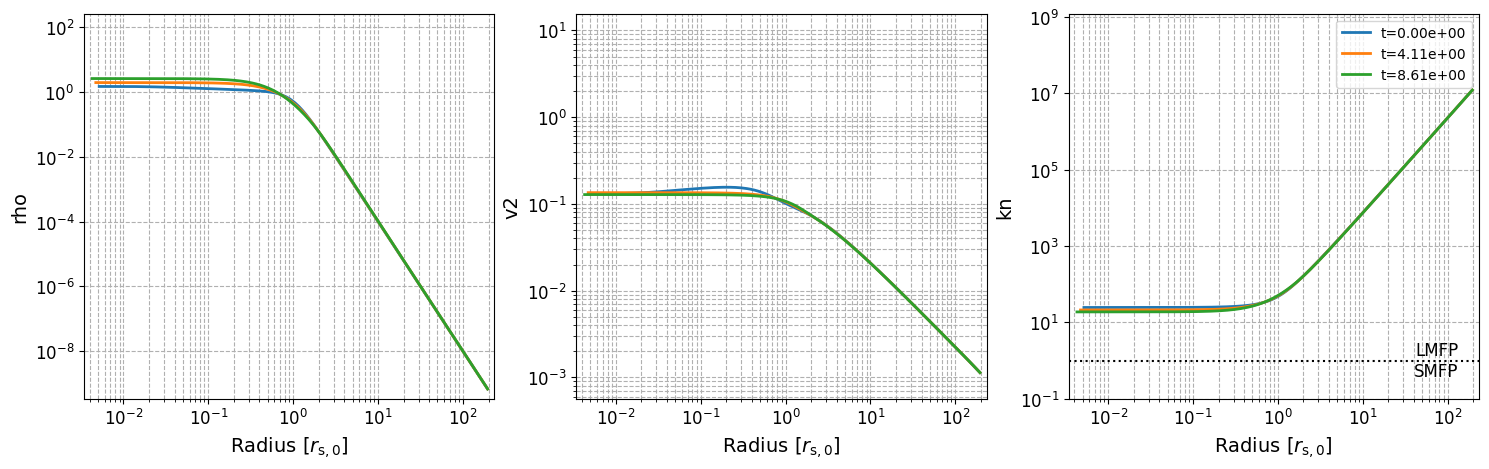

In [8]:
from pygtfcode import plot_snapshots
plot_snapshots(state, [0,5, 8], profiles=['rho','v2','kn'], grid=True)